## Exercises

In [13]:
!pip install pybamm
import pybamm as pb
import numpy as np
import matplotlib.pyplot as plt

## 1. Coupled degradation mechanisms

1. Run an electrochemical model of your choice with the SEI growth submodel of your choice too.
2. Add a lithium plating model of your choice to the previous model. You may want to run multiple cycles to see noticeable differences, and you may want to use the SPM model for faster simulations.
3. Now add an SEI on cracks submodel.
4. Compare the previous three models together. What differences do you observe?
5. Use the plot_summary_variables function and compare the summary degradation variables for the various degradation models. What do you observe? Tip: check the docs for more information about this function.

In [12]:
# lithium plating submodel options
plating_options = [
    'reversible',
    #"irreversible",
    #"partially reversible",
]

# SEI growth submodel options
SEI_options = [
    #"reaction limited",
    "solvent-diffusion limited",
    #"electron-migration limited",
    #"interstitial-diffusion limited",
    #"ec reaction limited",
]

# parameter sets to use
parameter_values = pb.ParameterValues("OKane2022")
#parameter_values.update(
#    {"Ambient temperature [K]": 268.15},
#    {"Upper voltage cut-off [V]": 4.21},
#    {"Lithium plating transfer coefficient": 0.5},
#    {"Dead lithium decay constant [s-1]": 1e-4},
#    {"Lithium plating kinetic rate constant [m.s-1]": 1E-9},
#)
print(parameter_values)

# using the SPM model for faster simulations
spm = pb.lithium_ion.SPM(options = {
        "SEI": 'solvent-diffusion limited',
        "lithium plating": 'reversible',
})

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'Dead lithium decay constant [s-1]': 1e-06,
 'Dead lithium decay rate [s-1]': <function SEI_limited_dead_lithium_OKane2022 at 0x000001B8051828E0>,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008_arrhenius at 0x000001B805183920>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008_arrhenius at 0x000001B8051837E0>,
 'Electron charge [C]': 1.602176634e-19,
 'Exchange-current density for plating [A.m-2]': <function 

In [16]:
spm.variables.search("Current density")

Results for 'Current density': ['Total current density [A.m-2]', 'Positive electrode SEI interfacial current density [A.m-2]', 'X-averaged positive electrode SEI interfacial current density [A.m-2]', 'Negative electrode SEI on cracks interfacial current density [A.m-2]', 'X-averaged negative electrode SEI on cracks interfacial current density [A.m-2]', 'Positive electrode SEI on cracks interfacial current density [A.m-2]', 'X-averaged positive electrode SEI on cracks interfacial current density [A.m-2]', 'Positive electrode lithium plating interfacial current density [A.m-2]', 'X-averaged positive electrode lithium plating interfacial current density [A.m-2]', 'Current collector current density [A.m-2]', 'Positive electrode SEI volumetric interfacial current density [A.m-3]', 'X-averaged positive electrode SEI volumetric interfacial current density [A.m-3]', 'Negative electrode SEI on cracks volumetric interfacial current density [A.m-3]', 'X-averaged negative electrode SEI on cracks v

In [8]:
# experiment conditions
discharge_experiment = pb.Experiment([
    "Discharge at C/20 until 2.5V",
    "Rest for 1 hour",
])

In [17]:
# running the experiment and plotting the results
sim_discharge = pb.Simulation(
    spm,
    parameter_values=parameter_values,
    experiment=discharge_experiment
)

t_eval = np.linspace(0, 3600, 100)  # time for solving the simulation
sol_discharge = sim_discharge.solve(t_eval)
sim_discharge.plot()

2025-07-21 11:42:34.104 - [WARNING] simulation.solve(551): Ignoring t_eval as solution times are specified by the experiment


interactive(children=(FloatSlider(value=0.0, description='t', max=21.265822026283328, step=0.21265822026283326…

Text(0.5, 1.0, 'Terminal voltage over time')

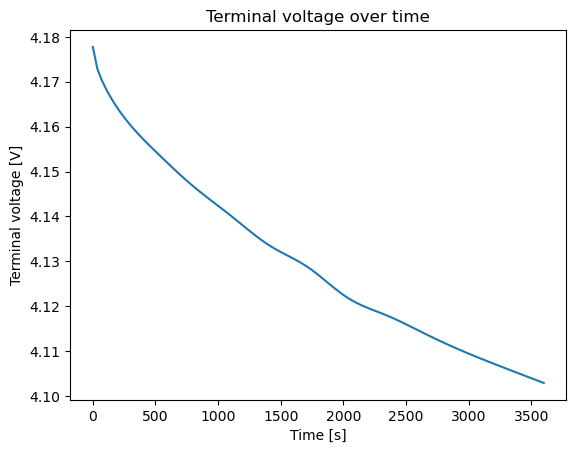

In [21]:
# plot of terminal voltage
times = t_eval
voltage = sol_discharge["Terminal voltage [V]"](times)
current_density = sol_discharge["Exchange current density [A.m-2]"](times)

plt.plot(times, voltage, "-")
plt.xlabel("Time [s]")
plt.ylabel("Terminal voltage [V]")
plt.title("Terminal voltage over time")

In [ ]:
# combining the SEI growth and the particle cracking submodels

# model with only SEI growth
model1 = pb.lithium_ion.DFN(options={"SEI": SEI_options, "particle mechanics": "swelling only"})
model2 = pb.lithium_ion.DFN(options={
    "SEI": SEI_options,
    "particle mechanics": "swelling and cracking",
    "SEI on cracks": "true",
})
